# House Pricing Prediction

## Project Overview

This project is part of the Kaggle competition “House Prices: Advanced Regression Techniques.
The goal is to predict housing sale prices based on property attributes such as living area, location, quality, and year.
Through data preprocessing, feature engineering, and machine learning, this notebook demonstrates how data-driven approaches can be applied to property valuation and price forecasting.

## Loading the Dataset

In [3]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

## Exploratory Data Analysis

This is to understand the variable type(numerical of categorical). To identify the missing values and outliers. To also gain insight on key price drivers.

In [4]:
train.head()
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Visualizing Sale Price Distribution

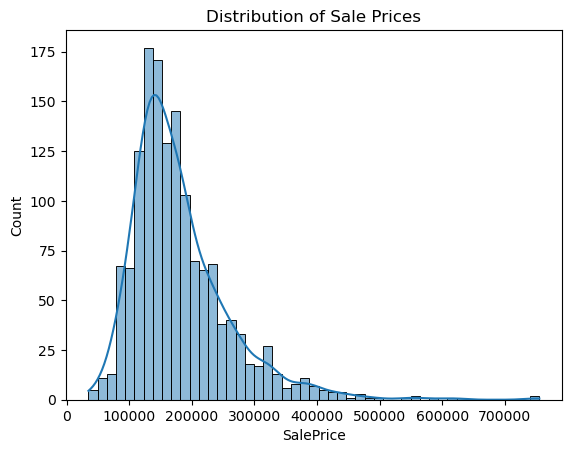

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(train['SalePrice'], kde=True)
plt.title("Distribution of Sale Prices")
plt.show()

The distribution is right-skewed, suggesting a log transformation could stabilize variance and improve model performance.

In [6]:
import numpy as np
y=np.log1p(train["SalePrice"])
train=train.drop("SalePrice", axis=1)

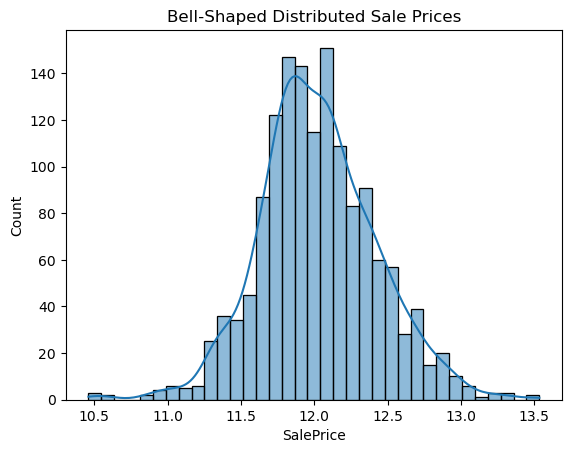

In [7]:
sns.histplot(y, kde=True)
plt.title("Bell-Shaped Distributed Sale Prices")
plt.show()

In [8]:
all_data = pd.concat([train,test],axis=0,ignore_index=True)
# Merging the train and test data for easy cleaning

## Data Cleaning and Preprocessing

After identifying missing columns:
Missing numeric values were imputed with the median.
For categorical features, mode imputation or "None" was applied where appropriate.

In [9]:
all_data.isnull().sum().sort_values(ascending=False).head(50)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
GarageCars          1
KitchenQual         1
BsmtFinSF1          1
SaleType            1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
GarageArea          1
Electrical          1
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
Id                  0
HalfBath            0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea  

In [10]:
# Columns where "None" is appropriate

none_cols=[
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
    "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
    "BsmtFinType2", "MasVnrType"
]
for col in none_cols:
    if col in all_data.columns:
        all_data[col]=all_data[col].fillna("None")

In [11]:
# Fill simple numeric features with zero

all_data["MasVnrArea"]=all_data["MasVnrArea"].fillna(0)
all_data["GarageYrBlt"]=all_data["GarageYrBlt"].fillna(0)

In [12]:
# Neighborhood-based median imputation

all_data["LotFrontage"]=all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [13]:
# Categorical mode imputation

cat_cols = all_data.select_dtypes(include=["object"]).columns
for col in cat_cols:
    all_data[col]= all_data[col].fillna(all_data[col].mode()[0])

In [14]:
# Numeric median imputation

num_cols = all_data.select_dtypes(exclude=["object"]).columns
for col in num_cols:
    all_data[col]= all_data[col].fillna(all_data[col].median())

## Encoding Categorical Variables

Applied one-hot encoding to convert categorical features into numerical format required by machine learning models.

In [15]:
all_data=pd.get_dummies(all_data)

### Split features and Target

In [16]:
n_train = len(y)
x = all_data.iloc[:n_train, :].copy()
x_test = all_data.iloc[n_train:, :].copy()

In [17]:
# Remove "Id" column as this won't help in the prediction (not predictive)

if "Id" in x.columns:
    x = x.drop("Id", axis=1)
if "Id" in x_test.columns:
    x_test_nos_id = x_test.drop("Id", axis=1)
else:
    x_test_nos_id = x_test

In [18]:
# Confirm no missing values remain

print("NaNs in x:", x.isnull().sum().sum())
print("Nans in x_test:", x_test_nos_id.isnull().sum().sum())

NaNs in x: 0
Nans in x_test: 0


## Train XGBoost, LightGBM, and CatBoost Models

In [25]:
!pip install xgboost lightgbm catboost

In [26]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = -cross_val_score(model, x, y, scoring="neg_root_mean_squared_error", cv=5)
    return rmse.mean()

# XGBoost
model_xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42
)

# LightGBM
model_lgb = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# CatBoost
model_cat = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    loss_function='RMSE',
    verbose=False,
    random_state=42
)

print("XGBoost RMSE:", rmse_cv(model_xgb))
print("LightGBM RMSE:", rmse_cv(model_lgb))
print("CatBoost RMSE:", rmse_cv(model_cat))


XGBoost RMSE: 0.12091021780950535
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3205
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 196
[LightGBM] [Info] Start training from score 12.021409
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3215
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 192
[LightGBM] [Info] Start training from score 12.023288
[LightGBM] [Warning] Found whitespace in feature_names, 

## Feature Importance (Random Forest + XGBoost)

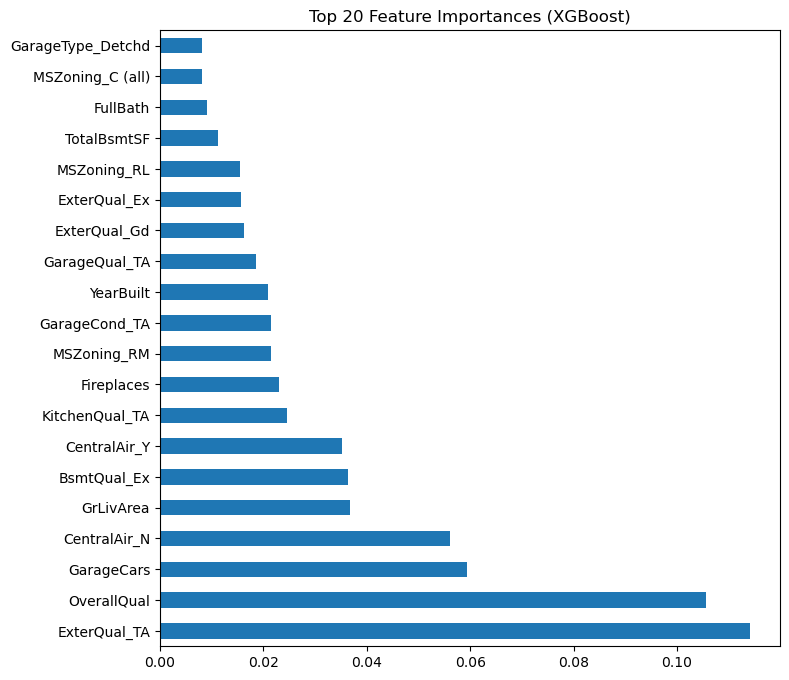

Found out that the most important feature is the quality of the material on the exterior


In [27]:
# Fit XGBoost for importance
model_xgb.fit(x, y)

importance = pd.Series(model_xgb.feature_importances_, index=x.columns)
importance.nlargest(20).plot(kind='barh', figsize=(8, 8))
plt.title("Top 20 Feature Importances (XGBoost)")
plt.show()
print("Found out that the most important feature is the quality of the material on the exterior")

## Hyperparameter Optimization (RandomizedSearchCV)
This example uses Random Forest, but you can adapt it for any model.

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [300, 500, 800, 1200],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x, y)

print("Best RF Params:", random_search.best_params_)
print("Best RMSE:", -random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best RMSE: 0.1427377425719881


## Model Stacking (Ensemble of XGBoost + LightGBM + CatBoost)
Stacking combines model predictions to improve accuracy.

In [29]:
from sklearn.linear_model import LinearRegression

# Fit individual models
model_xgb.fit(x, y)
model_lgb.fit(x, y)
model_cat.fit(x, y)

# Create meta-features
stack_train = pd.DataFrame({
    "xgb": model_xgb.predict(x),
    "lgb": model_lgb.predict(x),
    "cat": model_cat.predict(x)
})

# Meta-model
stacker = LinearRegression()
stacker.fit(stack_train, y)

# Evaluate stacking using cross-validation
stack_rmse = rmse_cv(stacker)
print("Stacked Model RMSE:", stack_rmse)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3491
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 202
[LightGBM] [Info] Start training from score 12.024057
Stacked Model RMSE: 0.1566200947475947


## Make Final Predictions With the Stacked Model

In [30]:
# Create meta-features for test set
stack_test = pd.DataFrame({
    "xgb": model_xgb.predict(x_test_nos_id),
    "lgb": model_lgb.predict(x_test_nos_id),
    "cat": model_cat.predict(x_test_nos_id)
})

# Final stacked prediction (log-scale)
stacked_preds_log = stacker.predict(stack_test)

# Convert from log1p to actual prices
final_predictions = np.expm1(stacked_preds_log) # convert model predictions back to real prices

# Build submission file
submission = pd.DataFrame({
    "Id": x_test["Id"],
    "SalePrice": final_predictions
})

submission.to_csv("stacked_submission.csv", index=False)
submission.head()

,Id,SalePrice
1460,1461,121908.096157
1461,1462,151030.120990
1462,1463,187477.754016
1463,1464,188076.276460
1464,1465,190351.390305
